# Marketing Analytics Portfolio Project

Dataset Used: https://www.kaggle.com/jackdaoud/marketing-data

### Import Necessary Libraries and Data

In [63]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

#Load Data
m_analytics = pd.read_csv(r'marketing_data.csv')
m_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

### Clean, Re-organize, and Optimize Data

In [3]:
#Drop Irrelevant Columns
drop_columns_list = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
#m_analytics.drop(labels=drop_columns_list, axis=1, inplace=True)

#Drop Irrelevant Rows
m_analytics = m_analytics[m_analytics.Marital_Status != 'Absurd']
m_analytics = m_analytics[m_analytics.Marital_Status != 'YOLO']

#Convert DataTypes for Optimized Preformance (from int64 to int16)
for column in m_analytics.columns:
    if m_analytics[column].dtype == 'int64':
        m_analytics[column] = m_analytics[column].astype('int16')
        
#Re-organize Order and Fix Income Column Name
m_analytics = m_analytics.sort_values('ID', ascending=True)
m_analytics.rename(columns={' Income ': 'Income'}, inplace=True)

#Convert Income Column from Currency($) to Int16
m_analytics['Income'] = m_analytics['Income'].replace( '[$,)]', '', regex=True).astype('float32')

#Drop all Entries with NAN and Null Values
m_analytics = m_analytics.dropna(how='any',axis=0) 

#Detect Duplicate Values
if m_analytics.duplicated()[:][1]:
    print('Duplicated Value Detected')

#Drop Duplicate Values (keeps first detection)
m_analytics.drop_duplicates(keep='first')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1503,0,1985,Graduation,Married,70951.0,0,0,5/4/13,66,239,...,9,1,0,0,0,0,0,0,0,SA
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
1956,9,1975,Master,Single,46098.0,1,1,8/18/12,86,57,...,2,8,0,0,0,0,0,0,0,CA
1311,13,1947,PhD,Widow,25358.0,0,1,7/22/13,57,19,...,3,6,0,0,0,0,0,0,0,SA
1834,17,1971,PhD,Married,60491.0,0,1,9/6/13,81,637,...,7,5,0,0,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,11178,1972,Master,Single,42394.0,1,0,3/23/14,69,15,...,3,7,0,0,0,0,0,0,0,GER
1925,11181,1949,PhD,Married,156924.0,0,0,8/29/13,85,2,...,0,0,0,0,0,0,0,0,0,CA
529,11187,1978,Basic,Single,26487.0,1,0,5/20/13,23,2,...,3,5,0,0,0,0,0,0,0,CA
1897,11188,1957,Graduation,Together,26091.0,1,1,2/25/14,84,15,...,3,5,0,0,0,0,0,0,0,SP


### Brief Overview of Selected Data

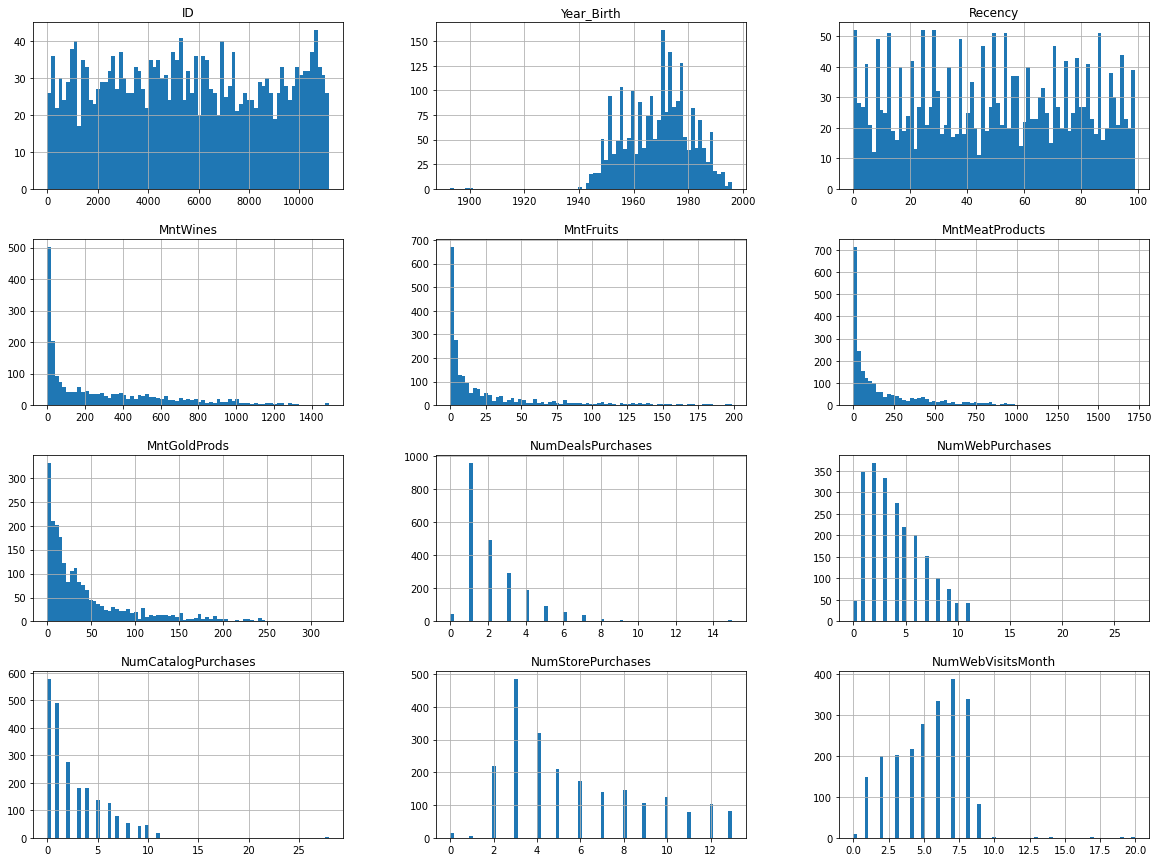

In [4]:
%matplotlib inline
#uses juypter's own backend to do graphics
m_analytics.hist(column=(['ID', 'Year_Birth', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']), bins=75, figsize=(20,15))
plt.show()

### Question #1 - What is the Best Selling Product Category?

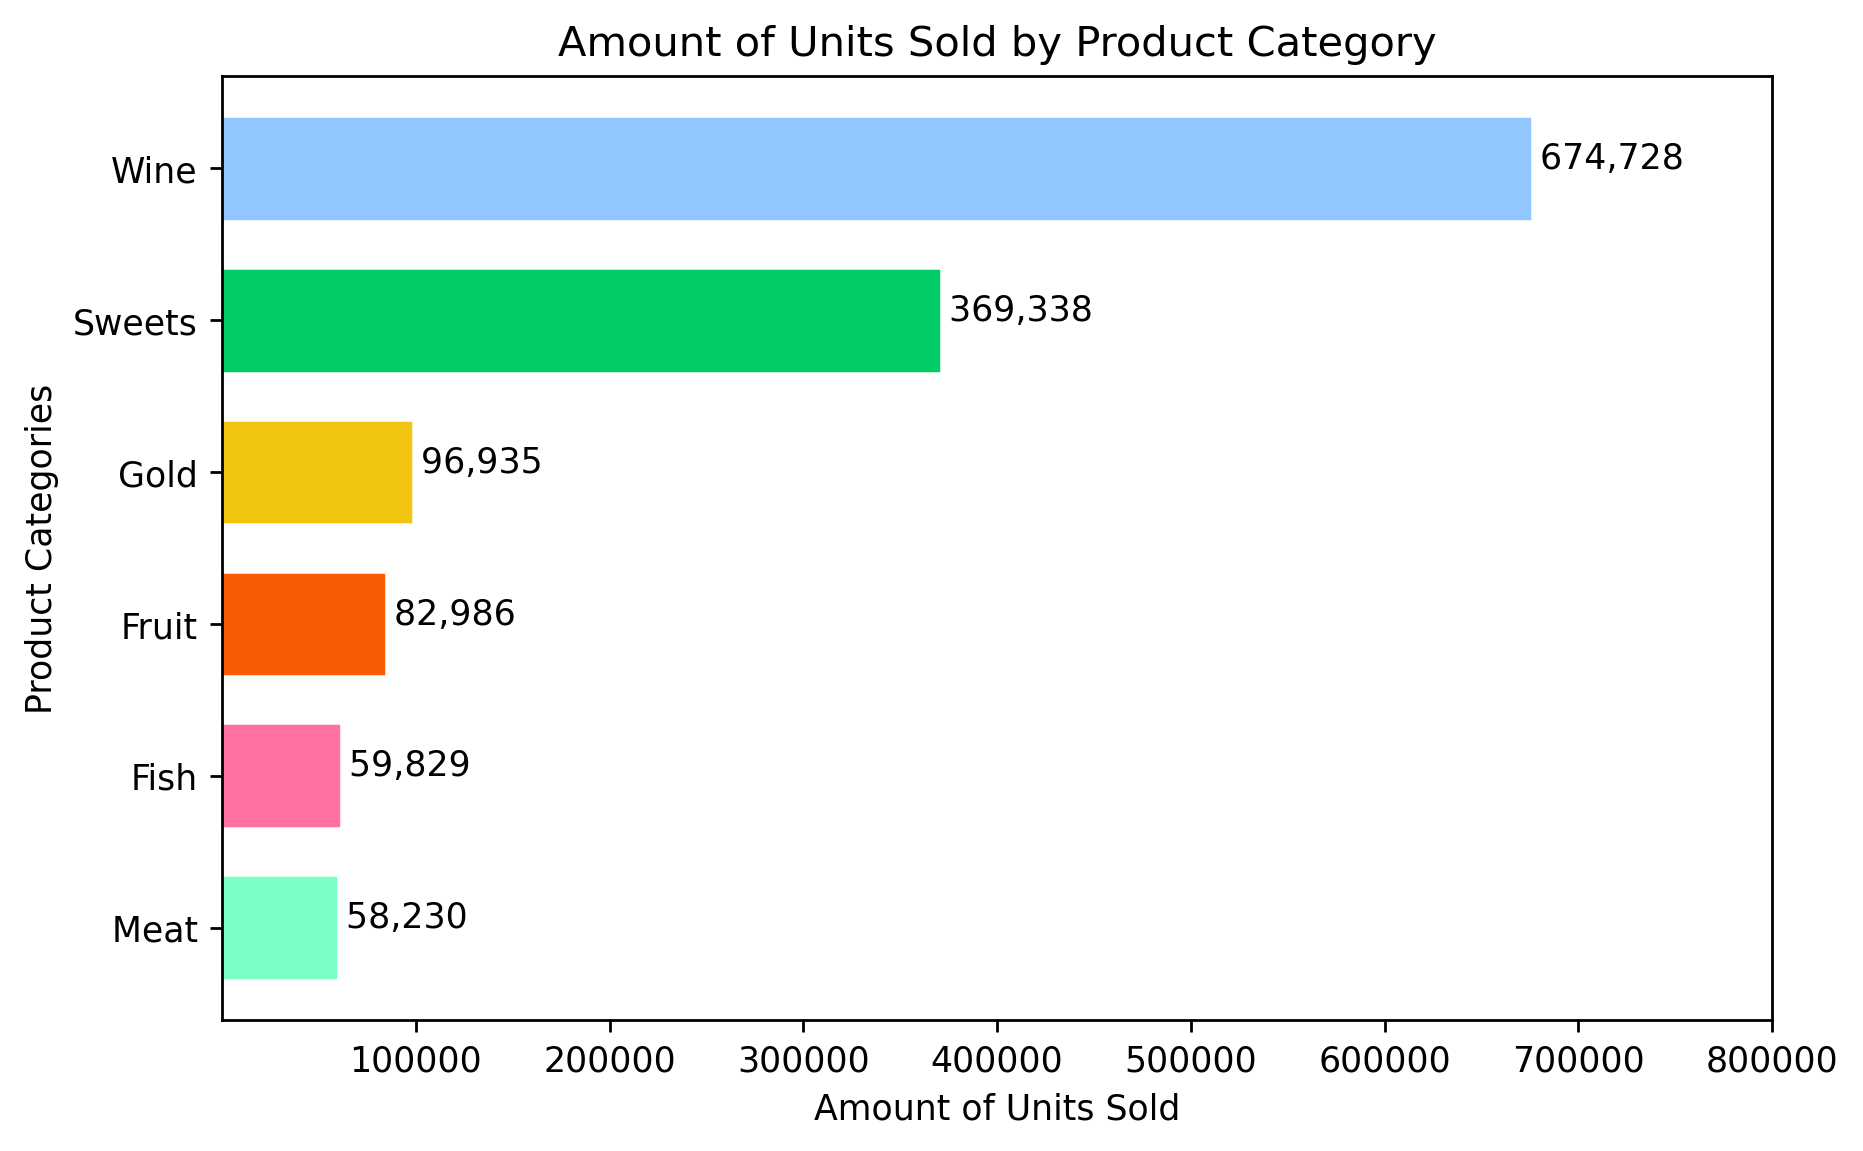

Wine is the best selling product. It accounts for over 50% of all products sold alone.


In [5]:
#Summarize Statistics    
wine_sum = m_analytics['MntWines'].sum()
fruit_sum = m_analytics['MntFruits'].sum()
meat_sum = m_analytics['MntMeatProducts'].sum()
fish_sum = m_analytics['MntFishProducts'].sum()
sweet_sum = m_analytics['MntSweetProducts'].sum()
gold_sum = m_analytics['MntGoldProds'].sum()

bsp_labels = ['Wine', 'Fruit', ' Meat', 'Fish', 'Sweets', 'Gold']
bsp_values = [wine_sum, fruit_sum, meat_sum, fish_sum, sweet_sum, gold_sum]

#Create Bar Chart
plt.figure(figsize=(8,5), dpi=250)

plt.style.use('seaborn-pastel')

plt.title("Amount of Units Sold by Product Category")
plt.xlabel("Amount of Units Sold")
plt.ylabel("Product Categories")

bsp_bar = plt.barh(sorted(bsp_labels), sorted(bsp_values), height=0.65)

for index, value in enumerate(sorted(bsp_values)):
    plt.text(value, index, " " + str(format(value, ',')))

color_patterns=['#7CFFC4', '#FF729F', '#F75C03', '#F1C40F', '#00CC66', '#92C6FF']
for bar in bsp_bar:
    bar.set_color(color_patterns.pop(0))
  
plt.xticks(ticks=[100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000])

plt.show()

print("Wine is the best selling product. It accounts for over 50% of all products sold alone.")

### Question #2 - What are is Educational and Marital Status of the Top 10% of Customers?

In [6]:
#Create a Copy of the Original DataFrame, Calculate Top 10% of Customers (Add a Column, Summarize all the Orders, Then Reorder the Data-sets)
#m_analytics.drop(labels='Total_Purchases', axis=1, inplace=True)
m_analytics.insert(23, "Total_Purchases", 0)
m_analytics.head()

#Fill the New Column with Customer's Total_Purchases
for index, row in m_analytics.iterrows():
    total_purchases = 0
    product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

    for product in product_columns:
        total_purchases += m_analytics.loc[index, product]
    
    m_analytics.at[index, 'Total_Purchases'] = total_purchases
    
#Sort the Columns and Calculate the Top 10% of Customers and Eliminate 90% of Customers
m_analytics_copy = m_analytics.copy()
m_analytics_copy = m_analytics_copy.sort_values('Total_Purchases', ascending=False)
top_customers = round(len(m_analytics_copy.index) * .1)
m_analytics_copy = m_analytics_copy.drop(m_analytics_copy.index[top_customers:])

#Calculate Necessary Statistics For Education and Marital Status
masters = m_analytics_copy["Education"].value_counts()["Master"]
graduation = m_analytics_copy["Education"].value_counts()["Graduation"]
phd = m_analytics_copy["Education"].value_counts()["PhD"]
nCycle = m_analytics_copy["Education"].value_counts()["2n Cycle"]
#basic = m_analytics_copy["Education"].value_counts()["Basic"] ## none-detected

single = m_analytics_copy["Marital_Status"].value_counts()["Single"]
together = m_analytics_copy["Marital_Status"].value_counts()["Together"]
married = m_analytics_copy["Marital_Status"].value_counts()["Married"]
widow = m_analytics_copy["Marital_Status"].value_counts()["Widow"]
divorced = m_analytics_copy["Marital_Status"].value_counts()["Divorced"]

sorted_education_values = sorted([masters, graduation, phd, nCycle])
sorted_marital_values = sorted([single, together, married, widow, divorced])

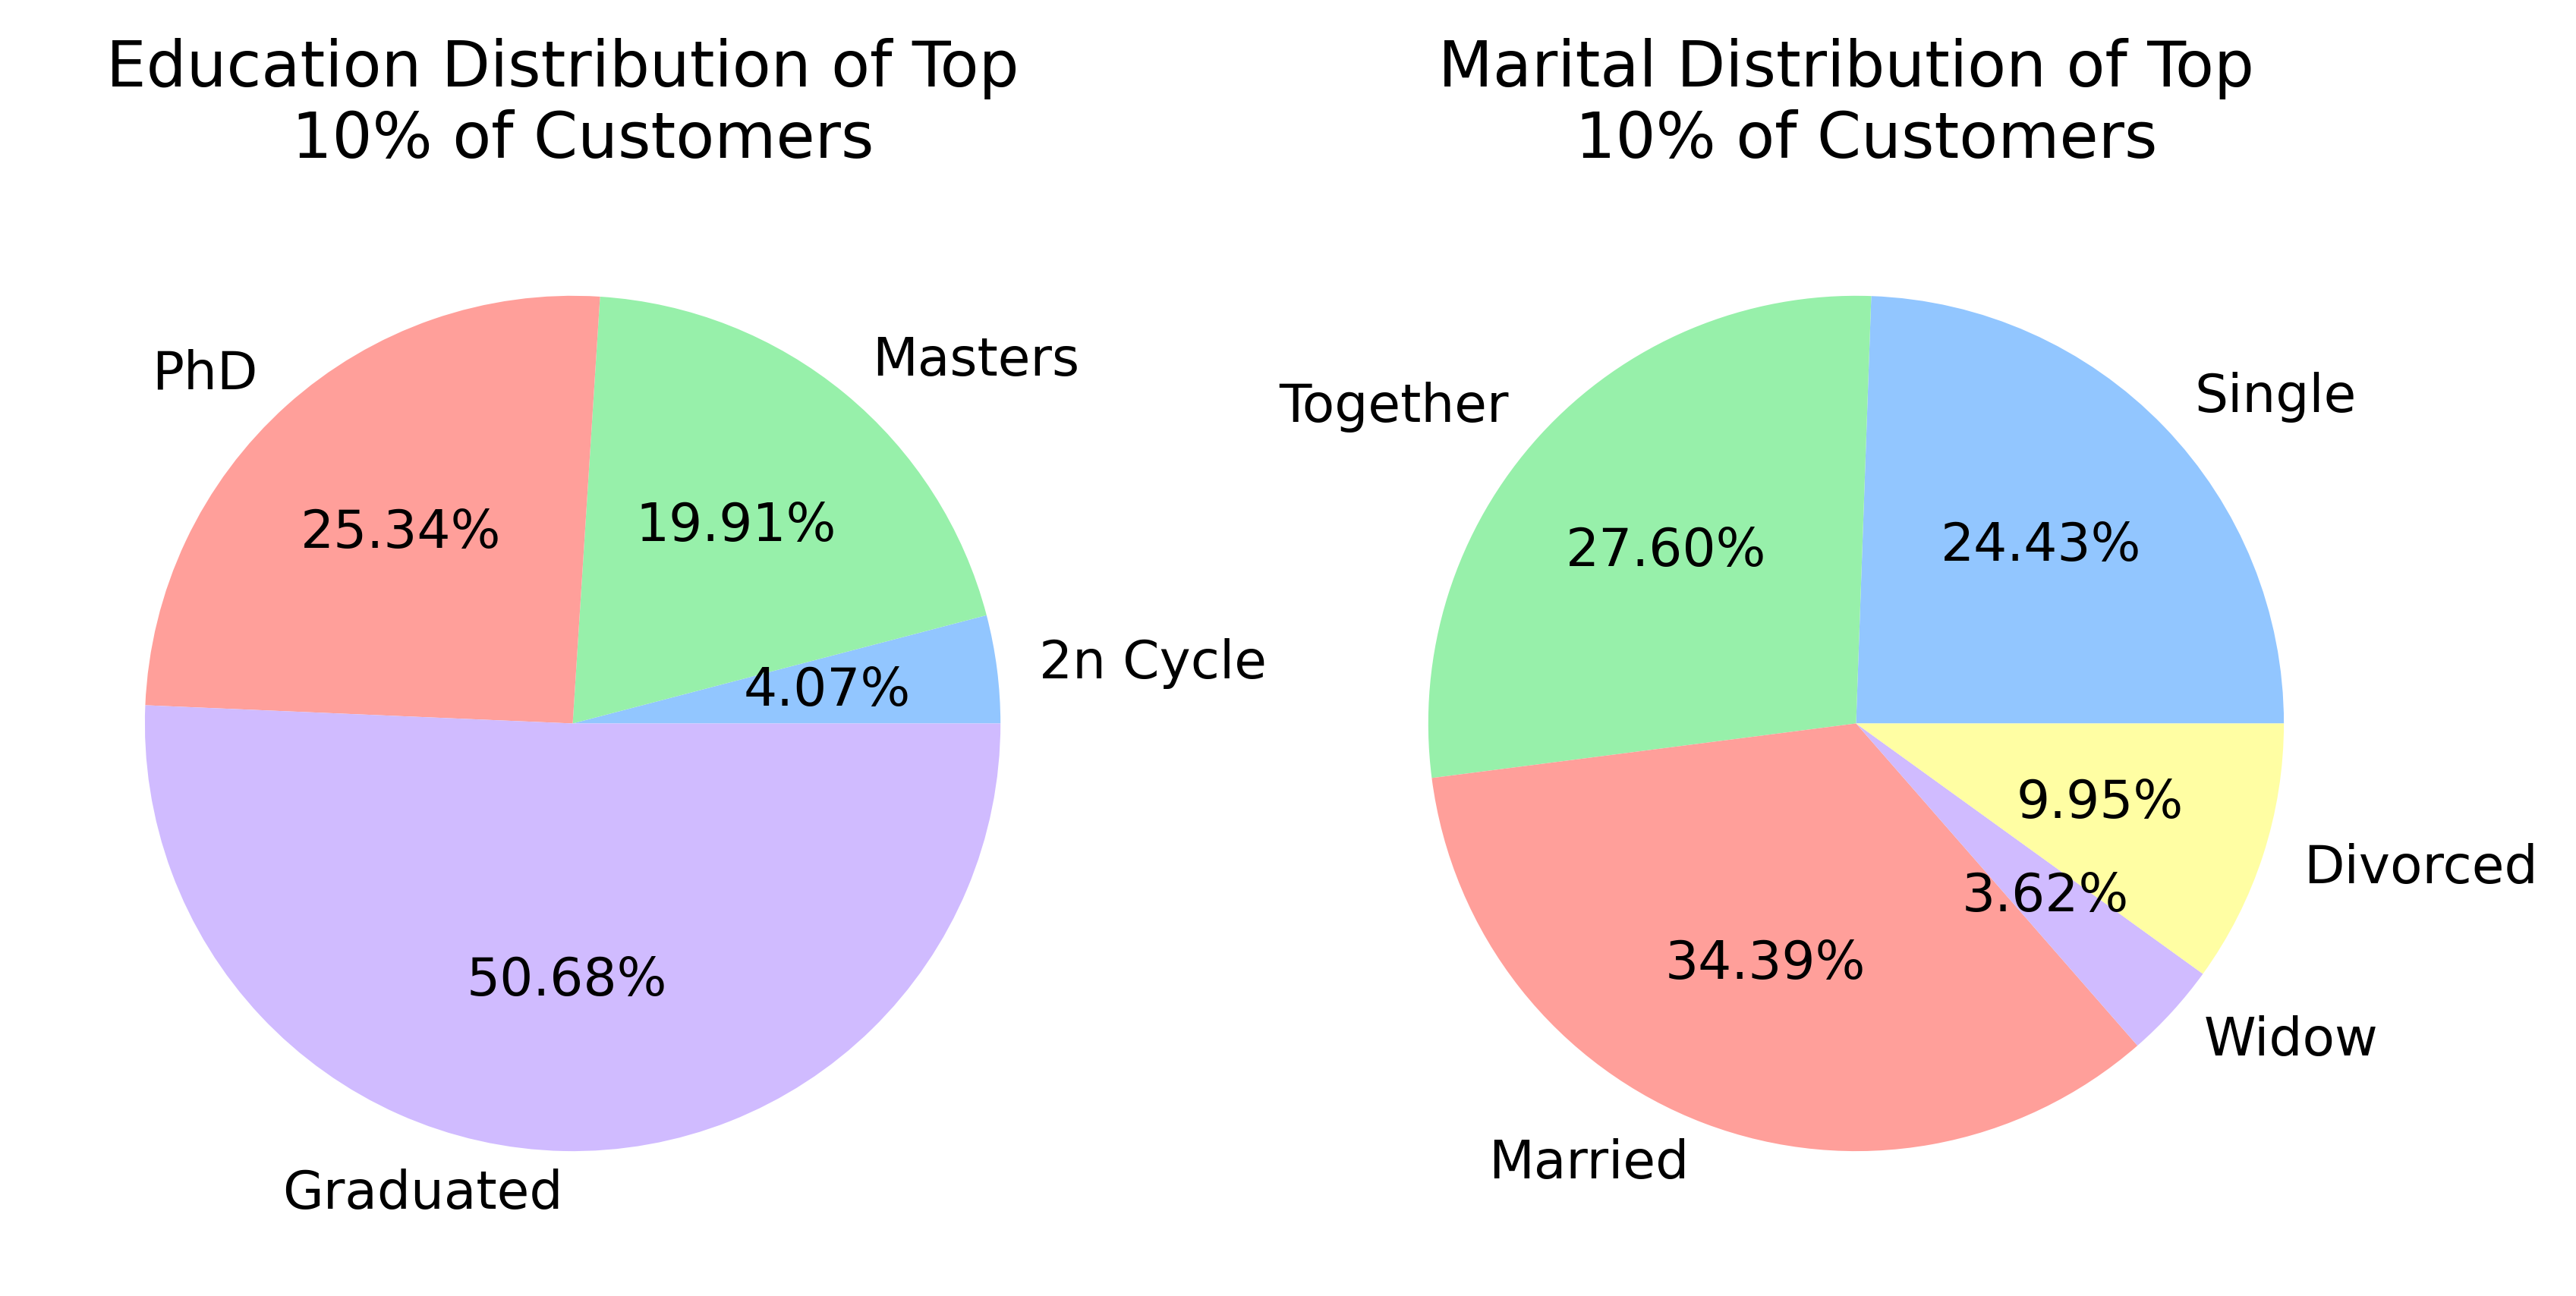

In terms of education, over 50% of the top 10% of customers have graduated high school. Over 40% of the 10% of customers either hold a PhD and Masters. Over 60% of the top 10% of customers are together or married with the rest being single, divorced, or widowed.


In [7]:
#Create A Subplot and Add Two Pie Charts to It
fig = plt.figure(figsize=(8,6),dpi=500)

#Add Education Pie Chart
ax1 = fig.add_subplot(121)
plt.title('Education Distribution of Top 10% of Customers')
education_labels = ["2n Cycle", "Masters", "PhD", "Graduated"]
plt.pie(sorted_education_values, labels=education_labels, autopct='%.2f%%')
plt.title('Education Distribution of Top \n 10% of Customers')

#Add Marital Pie Chart
ax2 = fig.add_subplot(122)
marital_labels = ["Single", "Together", "Married", "Widow", "Divorced"]
plt.pie([single, together, married, widow, divorced], labels = marital_labels, autopct='%.2f%%')
plt.title('Marital Distribution of Top \n 10% of Customers')

plt.show()

print("In terms of education, over 50% of the top 10% of customers have graduated high school. Over 40% of the 10% of customers either hold a PhD and Masters. Over 60% of the top 10% of customers are together or married with the rest being single, divorced, or widowed.")

### Question #3 - How does Income Affect Amount of Products Purchased?

<ipython-input-8-a097fd45b2d5>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


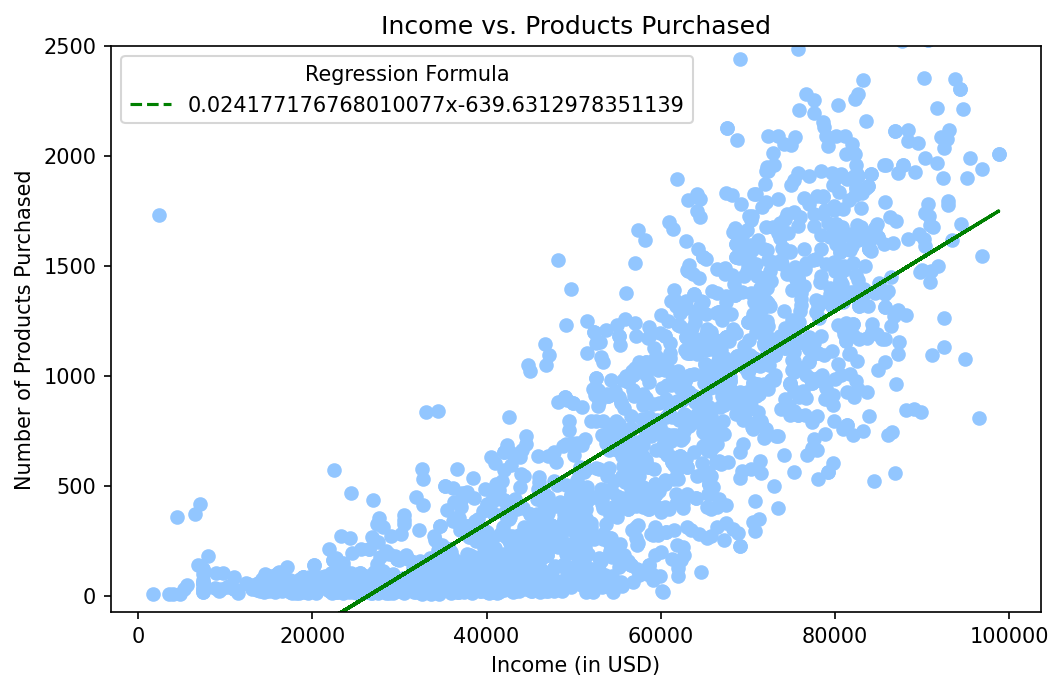

The above scatter plot and regression formula indicate a customer's income and amount of purchased products are positively correlated. For every $100 a customer's income increases, they purchases ~2 more products on average. Customers making between $80,000 to $100,000 buy the most products out of any other customer income group on an individual basis. Calculations could not be made for customers making over $100,000 as there is not enough data and they represent the vast minority of customers and product purchases.


In [8]:
#Create a Copy of the Original Dataframe
m_analytics_income_copy = m_analytics.copy()

#Eliminate All Data Above $100000
m_analytics_income_copy.drop(m_analytics_income_copy[m_analytics_income_copy.Income > 100000].index, inplace=True)
m_analytics_income_copy['Income'].max()

#Create Line Graph
plt.figure(figsize=(8,5), dpi=150)
plt.title('Income vs. Products Purchased')

ax=plt.axes()
ax.scatter(m_analytics_income_copy.Income, m_analytics_income_copy.Total_Purchases)
#Regression Calculations
m , b = np.polyfit(m_analytics_income_copy.Income, m_analytics_income_copy.Total_Purchases, 1)
plt.plot(m_analytics_income_copy.Income, m*m_analytics_income_copy.Income+b, 'g--', label=str(m)+'x'+str(b))
plt.ylim([-75, 2500])

ax.set_xlabel('Income (in USD)')
ax.set_ylabel('Number of Products Purchased')
ax.legend(title="Regression Formula")
plt.show()

print("The above scatter plot and regression formula indicate a customer's income and amount of purchased products are positively correlated. For every $100 a customer's income increases, they purchases ~2 more products on average. Customers making between $80,000 to $100,000 buy the most products out of any other customer income group on an individual basis. Calculations could not be made for customers making over $100,000 as there is not enough data and they represent the vast minority of customers and product purchases.")

### Question #4 - Create a Machine Learning Model that Can Help Sales Associates Predict a Potential Customer's Likely Purchases Given Their Demographics

#### Prepare Clean ML DataSet

In [9]:
m_analytics_ML = m_analytics.copy()

#Convert Education to Numeric
#revert_education = {1: 'Basic', 2: 'Graduation', 3: '2n Cycle', 4: 'Master', 5: 'PhD'}
#m_analytics.Education = [revert_education[item] for item in m_analytics.Education]
education = {'Basic': 1, 'Graduation': 2, '2n Cycle': 3, 'Master': 4, 'PhD': 5}
m_analytics_ML.Education = [education[item] for item in m_analytics.Education]
m_analytics_ML['Education'] = m_analytics_ML['Education'].astype('int16')

#Covert Marital Status to Numeric
m_analytics_ML['Marital_Status'] = m_analytics_ML['Marital_Status'].replace('Alone', 'Single', regex=True)
#revert_status = {1: 'Single', 2: 'Together', 3: 'Married', 4: 'Divorced', 5: 'Widow'}
#m_analytics_ML.Marital_Status = [revert_status[item] for item in m_analytics.Marital_Status]

status = {'Single': 1, 'Together': 2, 'Married': 3, 'Divorced': 4, 'Widow': 5}
m_analytics_ML.Marital_Status = [status[item] for item in m_analytics_ML.Marital_Status]
m_analytics_ML['Marital_Status'] = m_analytics_ML['Marital_Status'].astype('int16')

#Drop Date of Customer
m_analytics_ML = m_analytics_ML.drop(['Dt_Customer'], axis=1)

#Convert Countires to Numeric
#revert_country = {1: 'SA', 2: 'CA', 3: 'SP', 4: 'GER', 5: 'IND', 6:'US', 7:'AUS', 8:'ME'}
#m_analytics.Country = [revert_country[item] for item in m_analytics.Country]
country = {'SA': 1, 'CA': 2, 'SP': 3, 'GER': 4, 'IND': 5, 'US': 6, 'AUS': 7, 'ME': 8}
m_analytics_ML.Country = [country[item] for item in m_analytics.Country]
m_analytics_ML['Country'] = m_analytics_ML['Country'].astype('int16')

m_analytics_ML.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Total_Purchases,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1503,0,1985,2,3,70951.0,0,0,66,239,10,...,1,0,0,0,1198,0,0,0,0,1
1,1,1961,2,1,57091.0,0,0,0,464,5,...,5,0,0,0,577,0,1,1,0,2
1956,9,1975,4,1,46098.0,1,1,86,57,0,...,8,0,0,0,120,0,0,0,0,2
1311,13,1947,5,5,25358.0,0,1,57,19,0,...,6,0,0,0,32,0,0,0,0,1
1834,17,1971,5,3,60491.0,0,1,81,637,47,...,5,0,0,0,1028,0,0,0,0,3


In [71]:
#Create input (X) and output sets (y) and training and testing sets
X = m_analytics_ML.drop(columns=['ID', 'Income', 'Country', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',  'Response', 'Complain','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Purchases', 'AcceptedCmp5', 'AcceptedCmp4', 'AcceptedCmp3', 'AcceptedCmp2', 'AcceptedCmp1', 'NumCatalogPurchases'], axis=1) #input set
X.head()

y = m_analytics_ML['Total_Purchases'] #output set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #returns a tuple

#Create Decision Tree Model with Multi-Output Score
#model = DecisionTreeClassifier()
model.fit(X,y)

,Education,Marital_Status
1503,2,3
1,2,1
1956,4,1
1311,5,5
1834,5,3


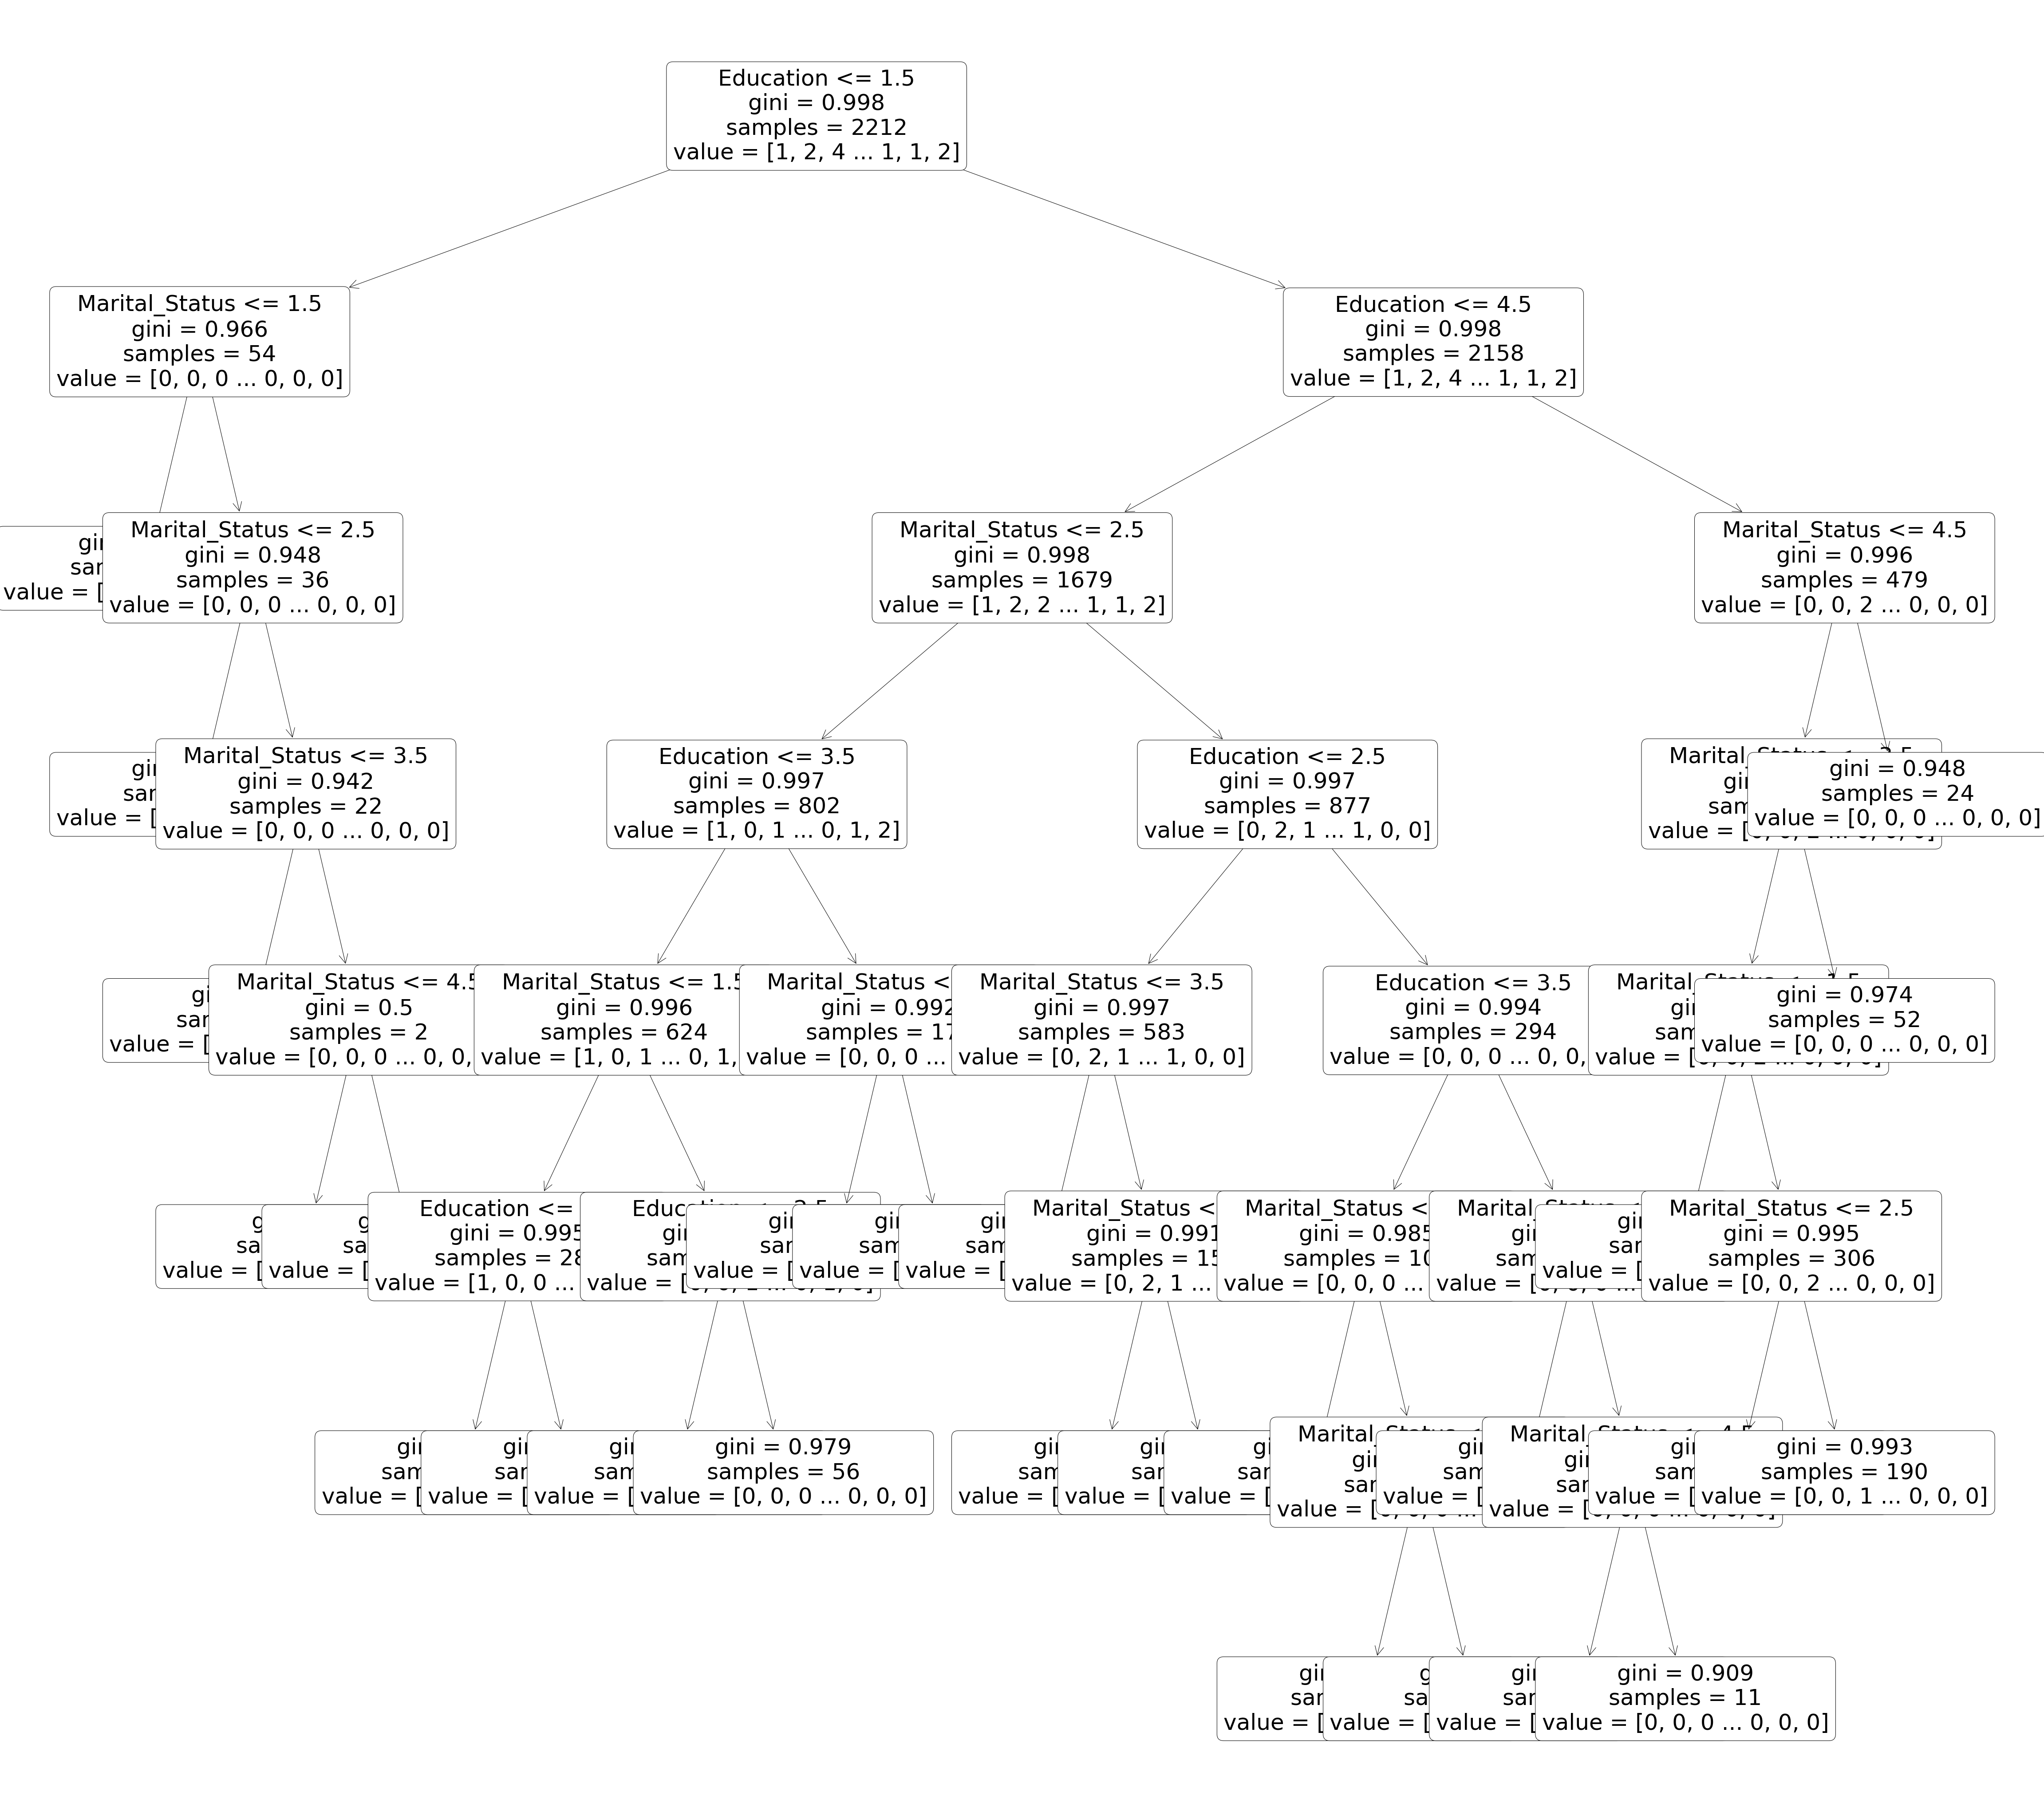

In [92]:
#Produce Decision Tree Visualization
plt.figure(figsize=(75,75))
tree.plot_tree(model, fontsize= 50, feature_names=X.columns.values.tolist(), label='all', rounded=True)
plt.show()